# <span style="color:#E18C12">1. Dealing with categorical featured</span>

- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to 'dummy variables'
    + 0: Observation was not that category
    + 1: Observation was that category
- scikit-learn: `OneHotEncoder()`
- pandas: `get_dummies()`

## Example:

In [3]:
import pandas as pd
auto_url = 'https://assets.datacamp.com/production/repositories/628/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
df = pd.read_csv(auto_url)    
df.head()    

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [4]:
df_origin = pd.get_dummies(df)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


- We can drop one of the origin dummy variable, because if two of them are 0, we know the third one will be 1:

In [5]:
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


# <span style="color:#E18C12">Linear Regression with dummy variables</span> 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = df_origin.drop('mpg', axis=1).values
y = df_origin['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7190645190217895

# <span style="color:#E18C12">Exercises</span> 

> ## 1. Exploring categorical features


The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.


- Import pandas as pd.
- Read the CSV file `'gapminder.csv'` into a DataFrame called `df`.
- Use pandas to create a boxplot showing the variation of life expectancy (`'life'`) by region (`'Region'`). To do so, pass the column names in to `df.boxplot()` (in that order).

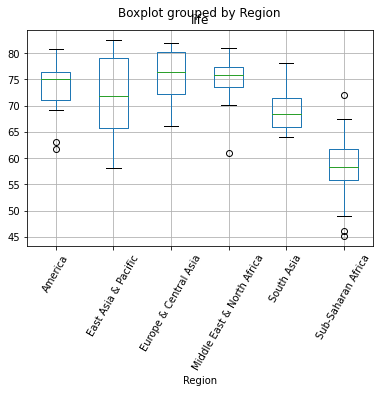

In [17]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


> ## 2. Creating dummy variables

As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the `'Region'` feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the `'Region'` feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.


- Use the pandas get_dummies() function to create dummy variables from the df DataFrame. Store the result as df_region.
- Print the columns of df_region. This has been done for you.
- Use the get_dummies() function again, this time specifying drop_first=True to drop the unneeded dummy variable (in this case, 'Region_America').
- Hit submit to print the new columns of df_region and take note of how one column

In [20]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


> ## 3. Regression with categorical features

Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array X and target variable array y have been pre-loaded.


- Import Ridge from sklearn.linear_model and cross_val_score from sklearn.model_selection.
- Instantiate a ridge regressor called ridge with alpha=0.5 and normalize=True.
- Perform 5-fold cross-validation on X and y using the cross_val_score() function.
- Print the cross-validated scores.

In [25]:
X = df_region.drop('life', axis=1).values
y = df_region['life'].values

In [28]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]
